In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("customer_churn.csv")  

In [4]:
df = data[["tenure","SeniorCitizen","MonthlyCharges","Churn"]]

In [ ]:
for i in df.columns:
    display(df[i].value_counts())

In [5]:
df.dtypes

tenure              int64
SeniorCitizen       int64
MonthlyCharges    float64
Churn              object
dtype: object

In [6]:
# SeniorCitizen column seems like to categorical as it has only two value
#so we convert it into categorical

df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")

<ipython-input-6-21c307c558f3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SeniorCitizen"] = df["SeniorCitizen"].astype("object")


In [7]:
df.dtypes

tenure              int64
SeniorCitizen      object
MonthlyCharges    float64
Churn              object
dtype: object

# Checking for imbalance in dataset


In [44]:
def chnge(x):
    if x == "No":
        return 0
    else:
        return 1
    
        

In [45]:
df["Churn"] = list(map(chnge,df["Churn"]))

<ipython-input-45-794f478418e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Churn"] = list(map(chnge,df["Churn"]))


In [46]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

<AxesSubplot:>

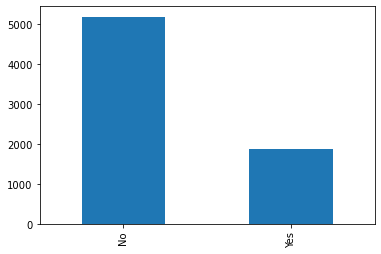

In [47]:
count_classes = y.value_counts()
count_classes
count_classes.plot(kind = 'bar')

In [48]:
y = df["Churn"]
X = df.drop(['Churn'],axis=1)

# Standardization of independent variables

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

# Seperating Numerical and Categorical

In [51]:
X_train_num = X_train.select_dtypes(exclude = "object")
X_train_cat = X_train.select_dtypes(include="object") 

In [52]:
X_train_num.columns

Index(['tenure', 'MonthlyCharges'], dtype='object')

In [53]:
X_train_cat.columns 

Index(['SeniorCitizen'], dtype='object')

# Checking for null values

In [54]:
X_train_num.isnull().sum() # there are no null values (it should be done before train test split)

tenure            0
MonthlyCharges    0
dtype: int64

# Standard Sclar on numeric data

In [56]:
# all features are numeric, so no need to split into _num and _cat
transformer = StandardScaler().fit(X_train_num)
X_train_scaled = pd.DataFrame(transformer.transform(X_train_num),columns=X_train_num.columns)
# because this is the only tranformation we apply to the numerics,
# we can immediately transform the X_test as well
#X_test_scaled = pd.DataFrame(transformer.transform(X_test),columns=X.columns)
X_train_scaled.head()

,tenure,MonthlyCharges
0,-0.340191,-0.514314
1,0.883210,0.017840
2,-1.196572,-0.819594
3,1.168670,-1.483535
4,-0.829552,0.658427


In [57]:
y_train.head()

3296    0
6397    0
6043    1
5309    0
3000    1
Name: Churn, dtype: int64

In [58]:
y_train = y_train.reset_index(drop=True)
# needed because the transformation also reset the index for X_train_scaled
# so we need this for y_test as well...
y_test = y_test.reset_index(drop=True)

In [59]:
y_train

0       0
1       0
2       1
3       0
4       1
       ..
5277    0
5278    0
5279    0
5280    1
5281    0
Name: Churn, Length: 5282, dtype: int64

In [60]:
X_train_cat = X_train_cat.reset_index(drop=True)
X_train_cat

,SeniorCitizen
0,0
1,1
2,0
3,0
4,0
...,...
5277,0
5278,0
5279,0
5280,1


# Ready train dataframe X_train_scaled_new

In [61]:
X_train_scaled_new = pd.concat([X_train_scaled,X_train_cat],axis =1) # ready data to fit into model

In [62]:
X_train_scaled_new

,tenure,MonthlyCharges,SeniorCitizen
0,-0.340191,-0.514314,0
1,0.883210,0.017840,1
2,-1.196572,-0.819594,0
3,1.168670,-1.483535,0
4,-0.829552,0.658427,0
...,...,...,...
5277,-0.707212,1.292341,0
5278,-0.911112,0.880297,0
5279,1.046330,-1.466853,0
5280,-1.278132,0.167978,1


# Processing on test data

In [63]:
X_test

,tenure,SeniorCitizen,MonthlyCharges
2200,19,0,58.20
4627,60,0,116.60
3225,13,0,71.95
2828,1,0,20.45
3768,55,0,77.75
...,...,...,...
3184,71,0,83.30
2551,12,0,19.45
5735,48,0,20.00
5096,71,0,86.85


# 1) making senior citizen as object

In [64]:
X_test["SeniorCitizen"] = X_test["SeniorCitizen"].astype("object")

# 2) Seperating num and cat

In [65]:
X_test_num = X_test.select_dtypes(exclude = "object")
X_test_cat = X_test.select_dtypes(include="object") 

# 3) Scaling numerical test data

In [66]:
X_test_scaled = pd.DataFrame(transformer.transform(X_test_num),columns=X_test_num.columns)

# 4) reseting categorical data 

In [67]:
X_test_cat = X_test_cat.reset_index(drop=True)

# 5) Concating test num and cat  , ready the test data for prediction

In [68]:
X_test_new = pd.concat([X_test_scaled,X_test_cat],axis =1) 
X_test_new

,tenure,MonthlyCharges,SeniorCitizen
0,-0.544091,-0.217375,0
1,1.127890,1.731076,0
2,-0.788772,0.241378,0
3,-1.278132,-1.476862,0
4,0.923990,0.434889,0
...,...,...,...
1756,1.576470,0.620058,0
1757,-0.829552,-1.510226,0
1758,0.638529,-1.491876,0
1759,1.576470,0.738500,0


# Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_scaled_new, y_train)
LR.score(X_test_new, y_test)

0.7808063600227144

In [70]:
pred = LR.predict(X_test_new)

print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))


precision:  0.6115942028985507
recall:  0.4557235421166307
f1:  0.5222772277227723


# Solving the problem of imbalance data

In [32]:
from imblearn.over_sampling import SMOTE

In [42]:
sm = SMOTE(random_state=100, k_neighbors=3)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train_scaled_new,y_train)

from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0, solver='lbfgs')
LR.fit(X_train_SMOTE, y_train_SMOTE)
pred = LR.predict(X_test_new)
LR.score(X_test_new, y_test)

#print("precision: ",precision_score(y_test,pred))
# print("recall: ",recall_score(y_test,pred))
# print("f1: ",f1_score(y_test,pred))

0.7194775695627484

In [43]:
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [ ]:
Y_test = y.map({'YES': 1, 'NO': 0}).astype(int)